CAPSTONE PROJECT - WALMART ASSIGNMENT

Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

In [3]:
import pandas as pd
walmart = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\Walmart DataSet.csv")
walmart

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

1. You are provided with the weekly sales data for their various outlets. Use statistical 
analysis, EDA, outlier analysis, and handle the missig
    values to come up with variou 
insights that can give them a clear perspective on the following:a. If the weekly sales are affected by the unemployment rate, if yes - which stores   
are suffering the most
y.

Stores suffering the most due to unemployment rate:
    Store  correlation
37     38    -0.785290
43     44    -0.780076
38     39    -0.384681
41     42    -0.356355
40     41    -0.350630


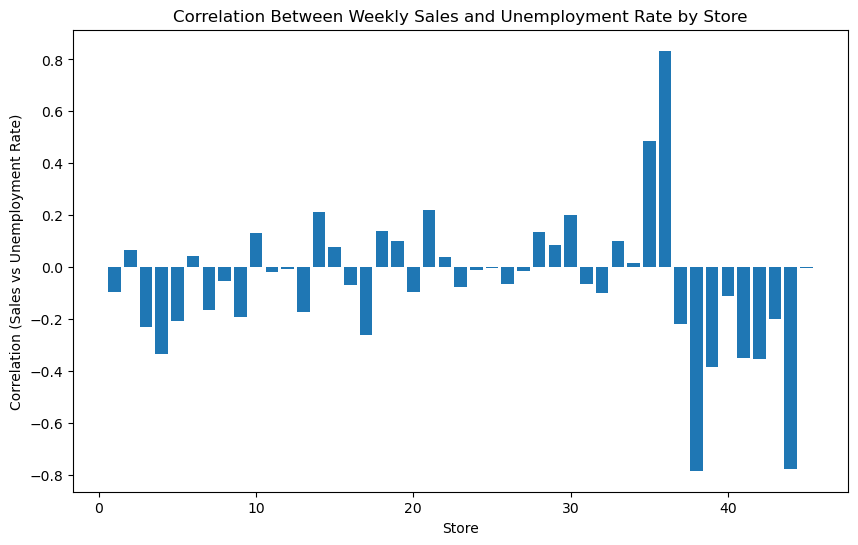

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

walmart = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\Walmart DataSet.csv")
store_correlation = walmart.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Unemployment'])
).reset_index(name='correlation')
suffering_stores = store_correlation.sort_values(by='correlation')
print("Stores suffering the most due to unemployment rate:")
print(suffering_stores.head())
plt.figure(figsize=(10,6))
plt.bar(suffering_stores['Store'], suffering_stores['correlation'])
plt.xlabel('Store')
plt.ylabel('Correlation (Sales vs Unemployment Rate)')
plt.title('Correlation Between Weekly Sales and Unemployment Rate by Store')
plt.show()


b. If the weekly sales show a seasonal trend, when and what could be the reason?

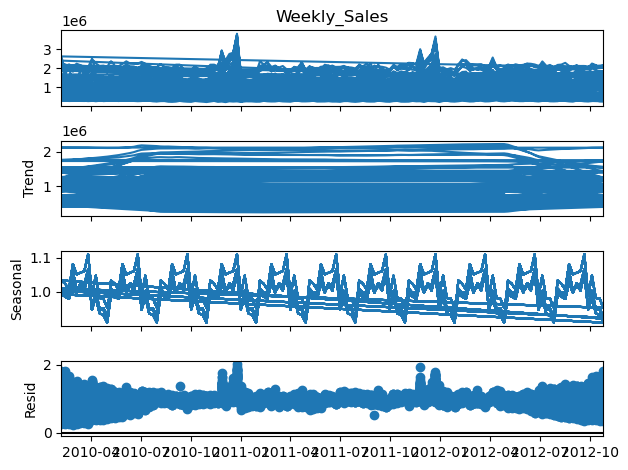

Highest seasonal sales week: 2010-12-24 00:00:00
Lowest seasonal sales week: 2010-07-30 00:00:00


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(walmart['Weekly_Sales'], model='multiplicative', period=52)
decomposition.plot()
plt.show()
seasonal_component = decomposition.seasonal

peak_week = seasonal_component.idxmax()
low_week = seasonal_component.idxmin()

print(f"Highest seasonal sales week: {peak_week}")
print(f"Lowest seasonal sales week: {low_week}")


c. Does temperature affect the weekly sales in any manner?

Correlation between Temperature and Weekly Sales: -0.0638100131794696


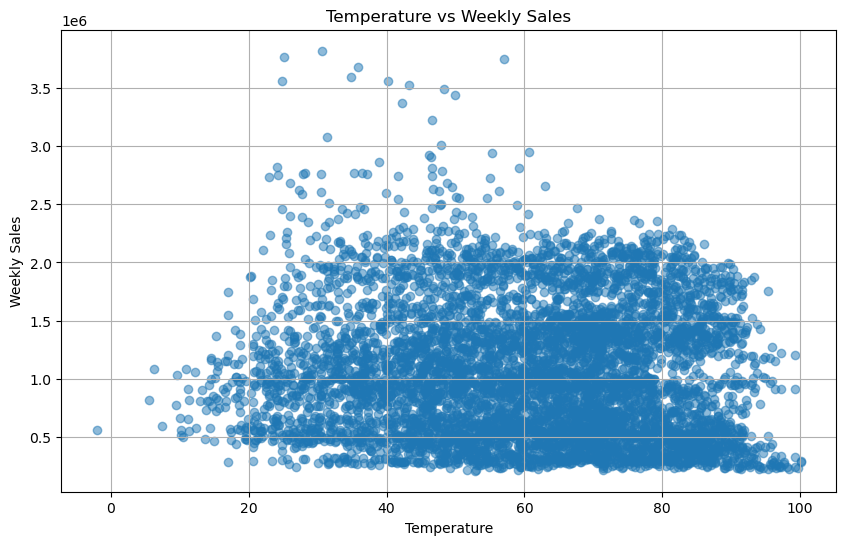

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

correlation = walmart['Weekly_Sales'].corr(walmart['Temperature'])
print(f"Correlation between Temperature and Weekly Sales: {correlation}")
plt.figure(figsize=(10,6))
plt.scatter(walmart['Temperature'], walmart['Weekly_Sales'], alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


d. How is the Consumer Price index affecting the weekly sales of various stores?

Correlation between CPI and Weekly Sales for each store:
    Store  correlation
0       1     0.225408
1       2    -0.062431
2       3     0.317250
3       4     0.351157
4       5     0.308261
5       6    -0.011357
6       7     0.289044
7       8     0.120255
8       9     0.294805
9      10    -0.115374
10     11     0.069781
11     12     0.084087
12     13     0.163976
13     14    -0.419755
14     15    -0.174467
15     16     0.124285
16     17     0.348571
17     18    -0.193541
18     19    -0.155341
19     20     0.058706
20     21    -0.163649
21     22    -0.038602
22     23     0.084248
23     24    -0.013684
24     25    -0.010914
25     26     0.131980
26     27    -0.213082
27     28    -0.095908
28     29    -0.072530
29     30    -0.298188
30     31     0.132887
31     32     0.196782
32     33    -0.052271
33     34     0.115437
34     35    -0.424107
35     36    -0.915095
36     37     0.244507
37     38     0.812837
38     39     0.428043
39     40     0.113318


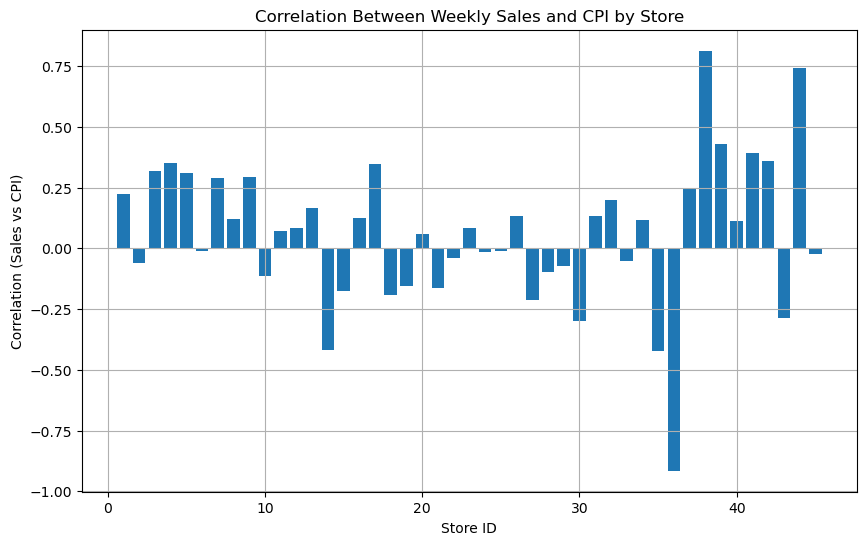

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

cpi_correlation = walmart.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI'])).reset_index(name='correlation')
print("Correlation between CPI and Weekly Sales for each store:")
print(cpi_correlation)
strong_positive = cpi_correlation[cpi_correlation['correlation'] > 0.5]
strong_negative = cpi_correlation[cpi_correlation['correlation'] < -0.5]

print("\nStores with strong positive correlation (CPI increases, Sales increase):")
print(strong_positive)
print("\nStores with strong negative correlation (CPI increases, Sales decrease):")
print(strong_negative)

plt.figure(figsize=(10,6))
plt.bar(cpi_correlation['Store'], cpi_correlation['correlation'])
plt.xlabel('Store ID')
plt.ylabel('Correlation (Sales vs CPI)')
plt.title('Correlation Between Weekly Sales and CPI by Store')
plt.grid(True)
plt.show()


e. Top performing stores according to the historical data.

Top 5 performing stores based on historical data:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08


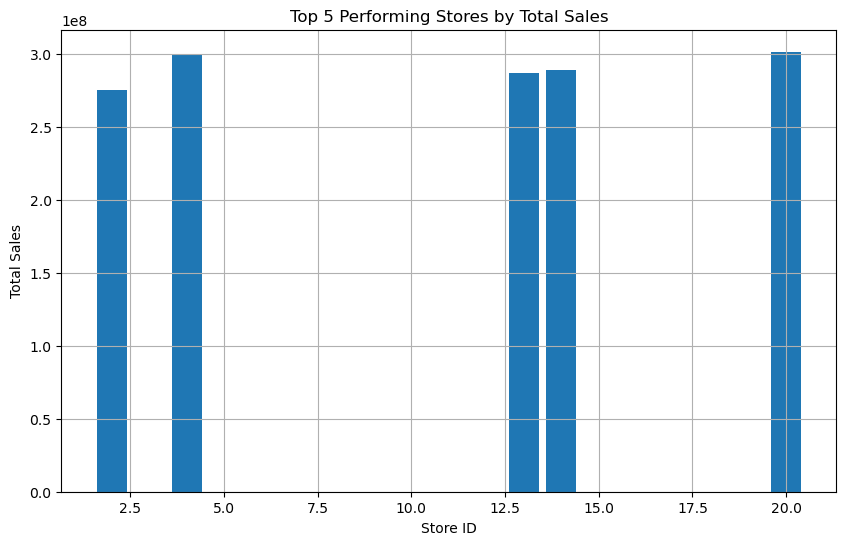

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

store_sales = walmart.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)
print("Top 5 performing stores based on historical data:")
print(top_stores.head())
plt.figure(figsize=(10,6))
plt.bar(top_stores['Store'].head(), top_stores['Weekly_Sales'].head())
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.title('Top 5 Performing Stores by Total Sales')
plt.grid(True)
plt.show()


f. The worst performing store, and how significant is the difference between the   
highest and lowest performing stores

Worst performing store: Store 33.0 with total sales of 37160221.96
Best performing store: Store 20.0 with total sales of 301397792.46
Difference between highest and lowest performing stores: 264237570.49999997


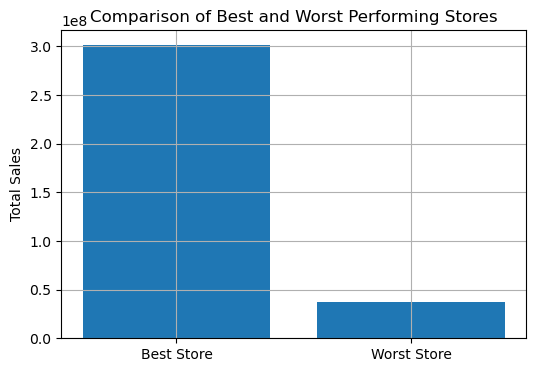

In [45]:
import pandas as pd

store_sales = walmart.groupby('Store')['Weekly_Sales'].sum().reset_index()
best_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]
worst_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]
sales_difference = best_store['Weekly_Sales'] - worst_store['Weekly_Sales']
print(f"Worst performing store: Store {worst_store['Store']} with total sales of {worst_store['Weekly_Sales']}")
print(f"Best performing store: Store {best_store['Store']} with total sales of {best_store['Weekly_Sales']}")
print(f"Difference between highest and lowest performing stores: {sales_difference}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(['Best Store', 'Worst Store'], [best_store['Weekly_Sales'], worst_store['Weekly_Sales']])
plt.ylabel('Total Sales')
plt.title('Comparison of Best and Worst Performing Stores')
plt.grid(True)
plt.show()


2. Use predictive modeling techniques to forecast the sales for each store for the next 12 
week.s

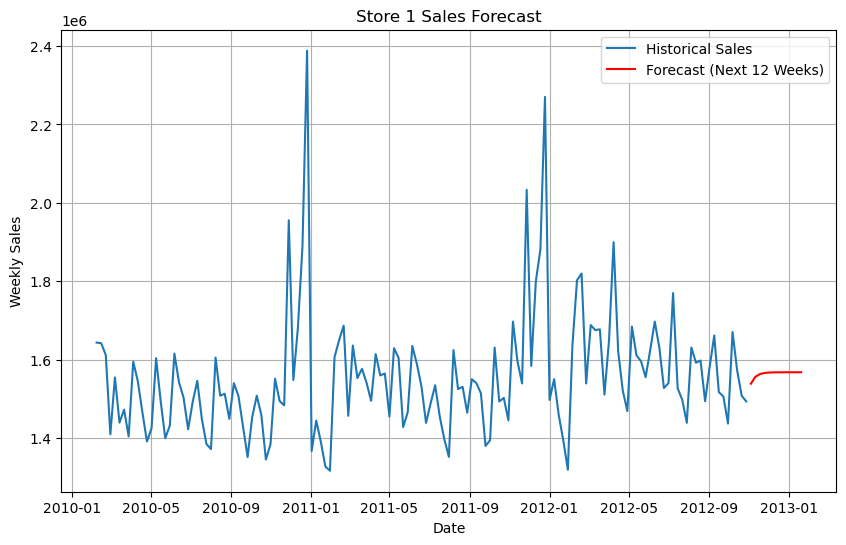

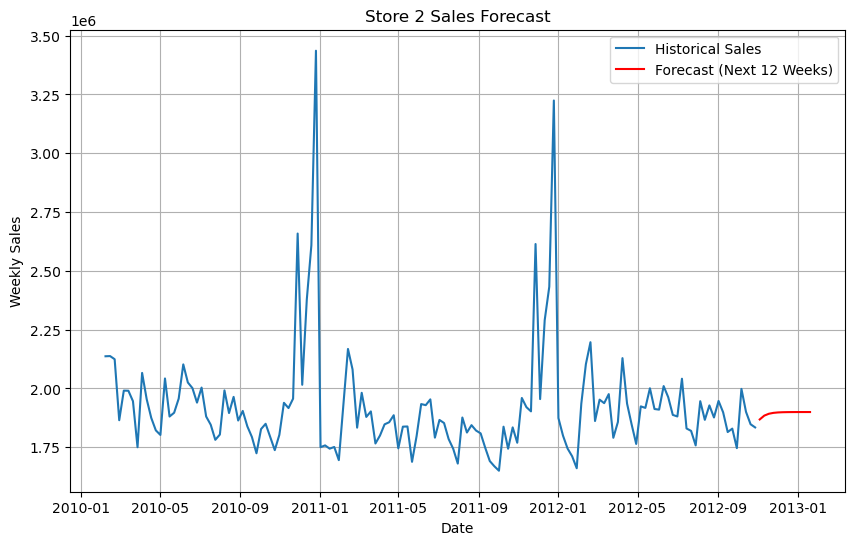

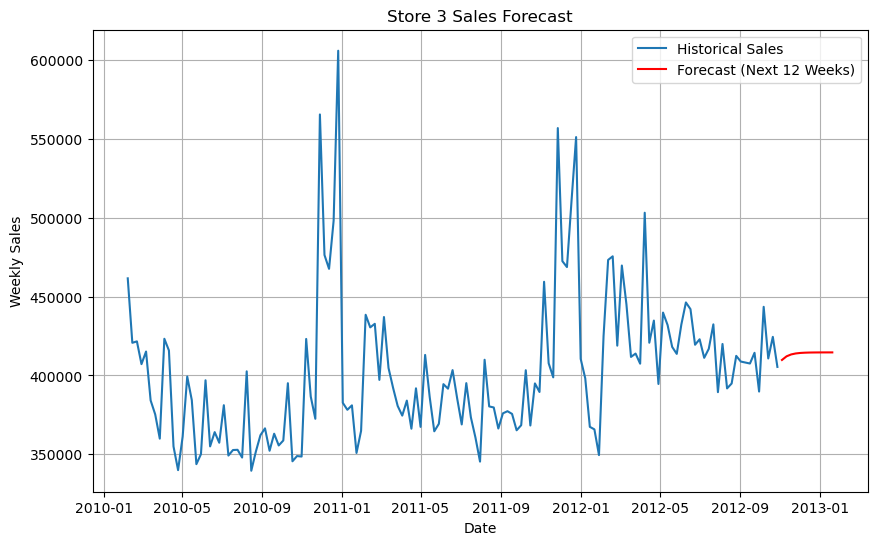

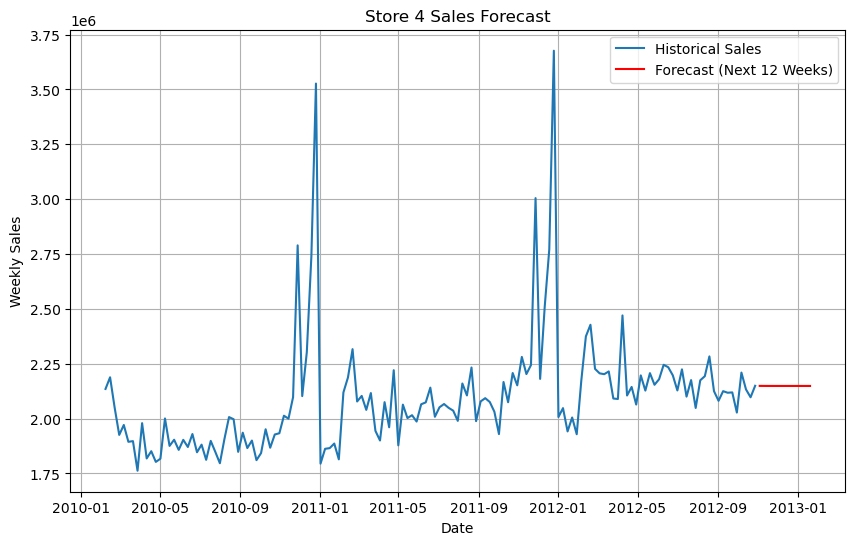

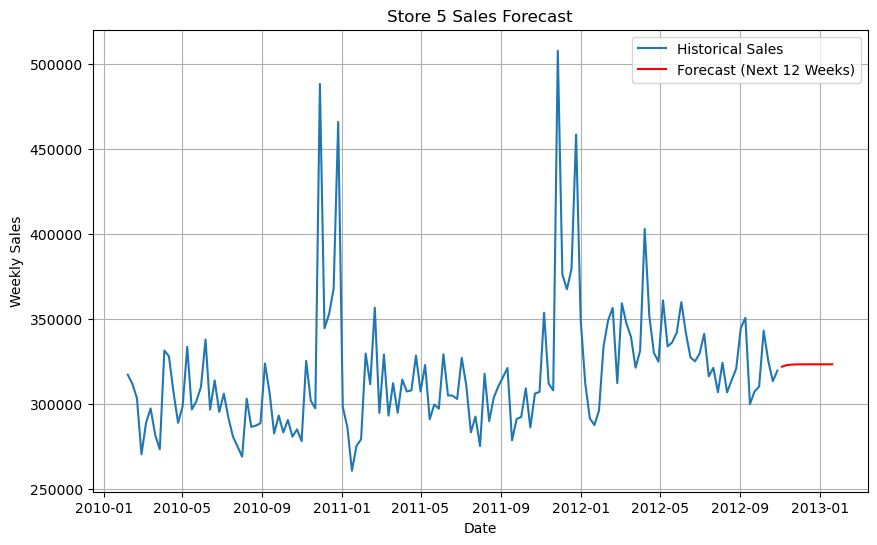

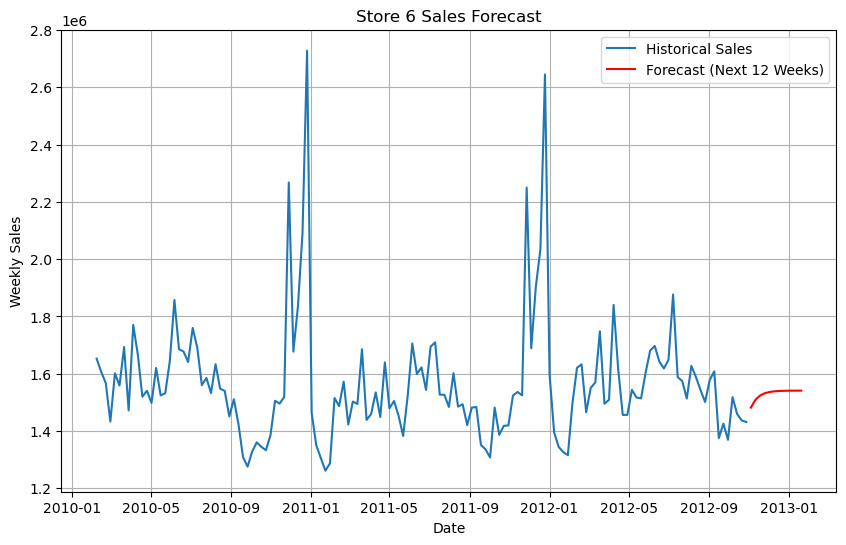

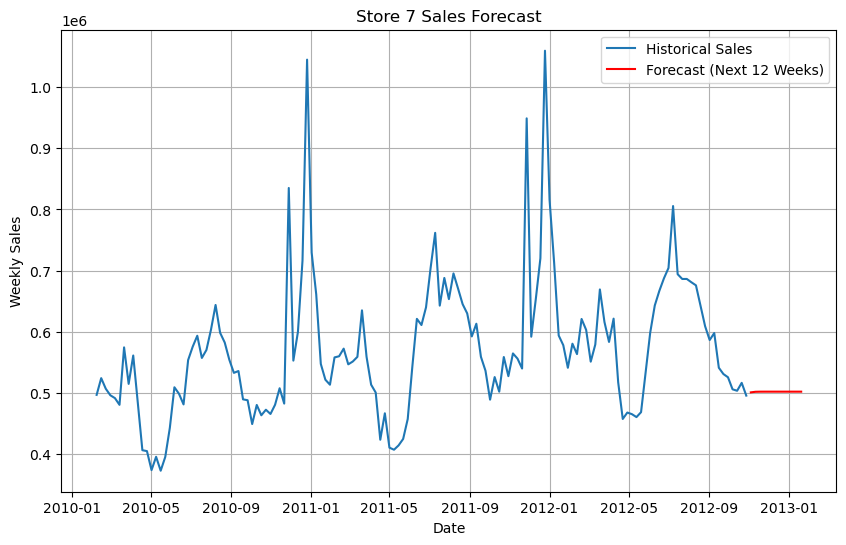

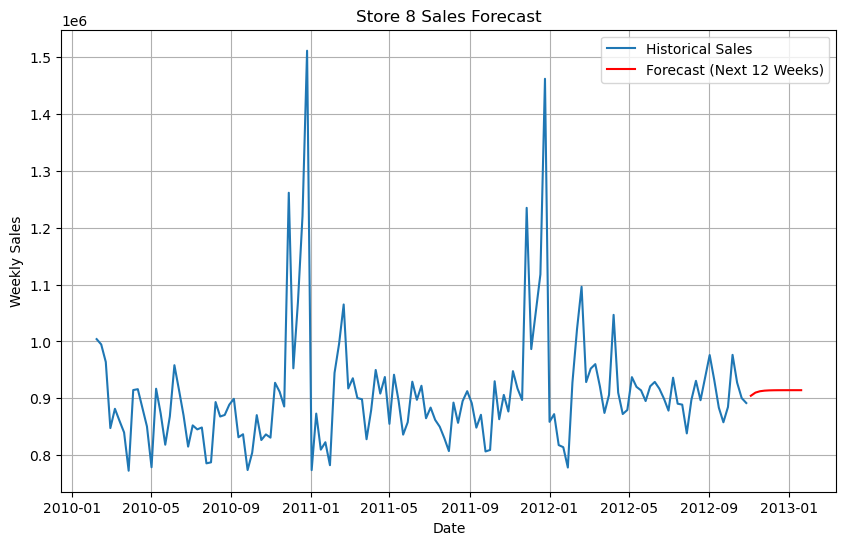

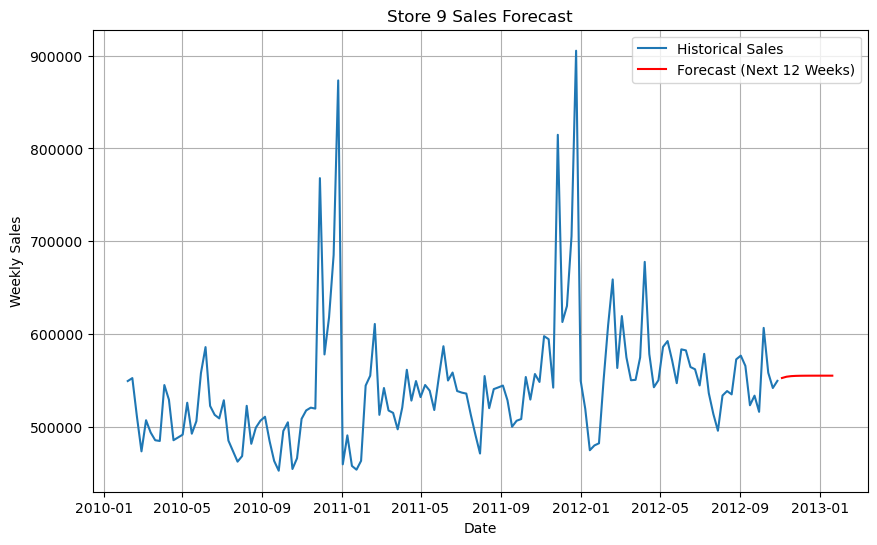

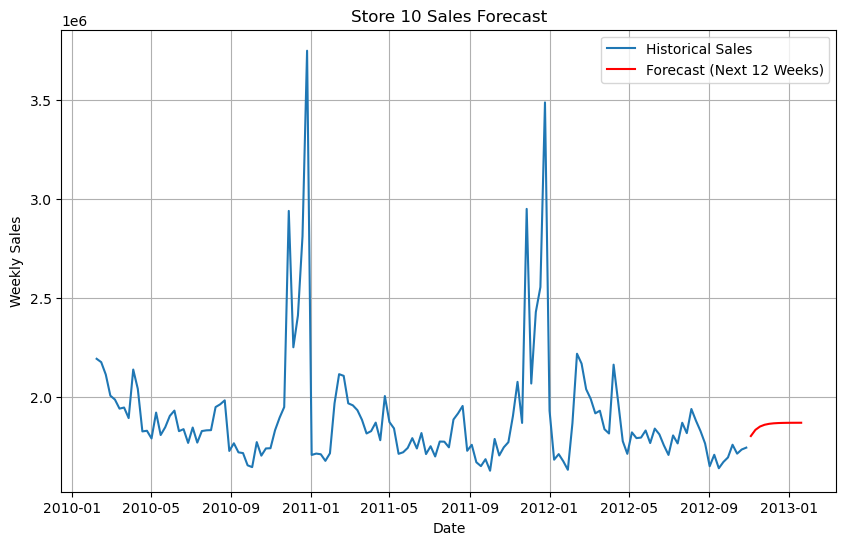

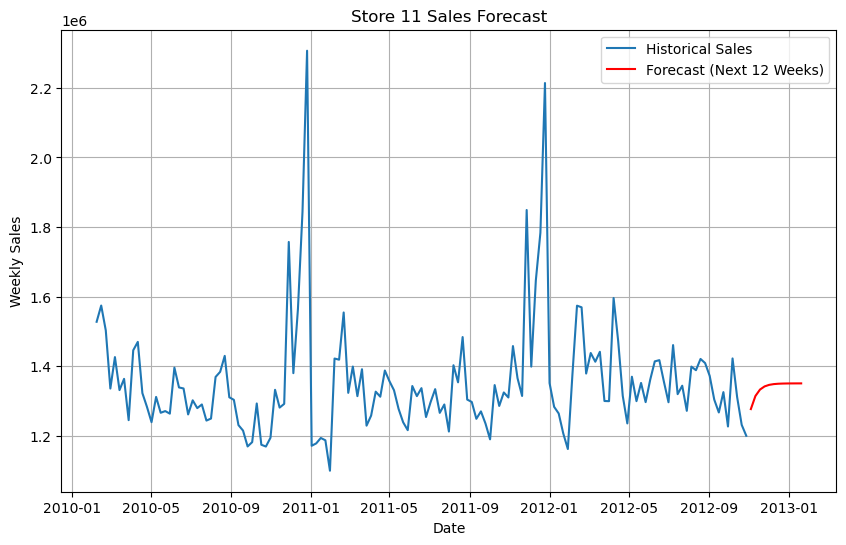

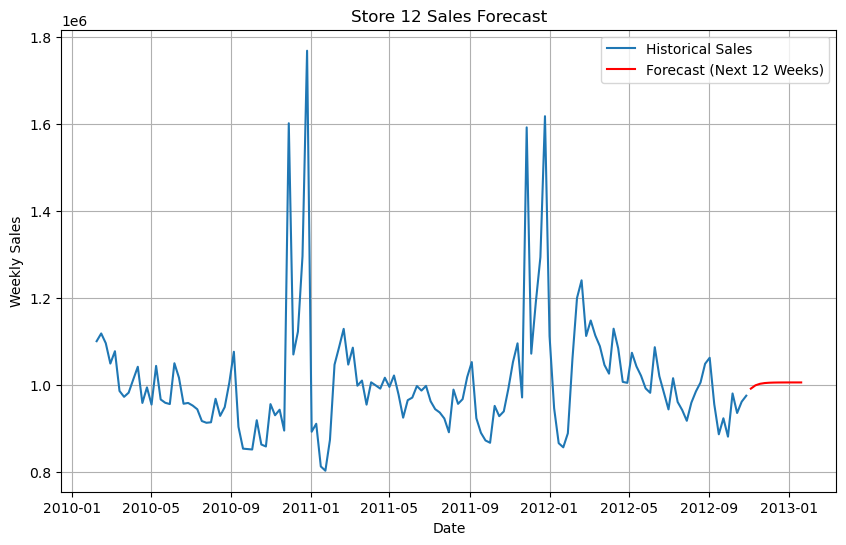

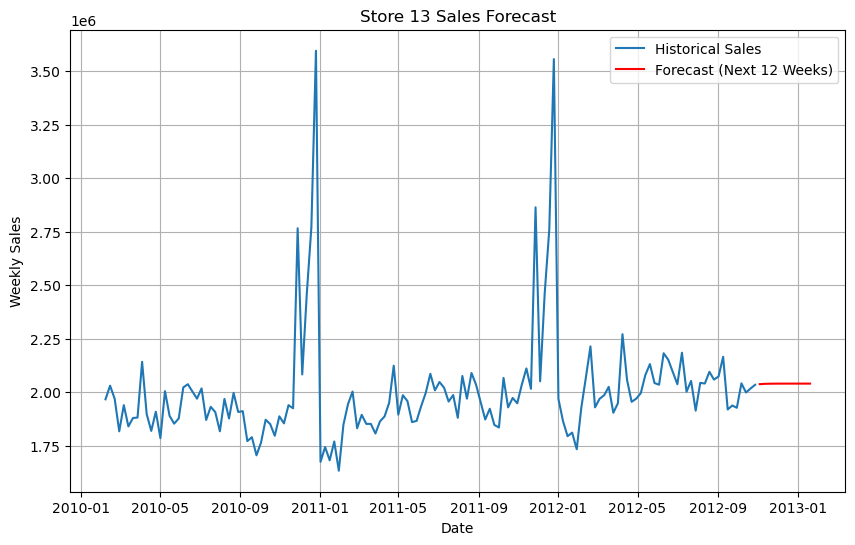

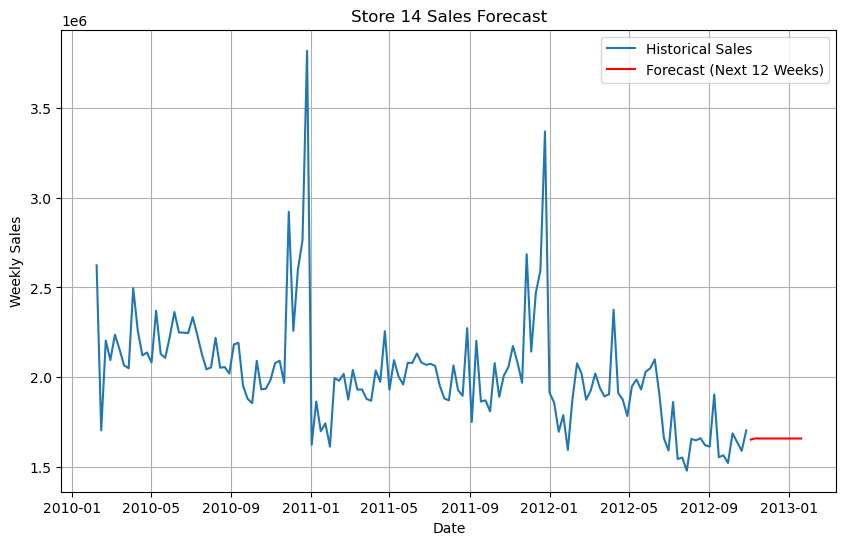

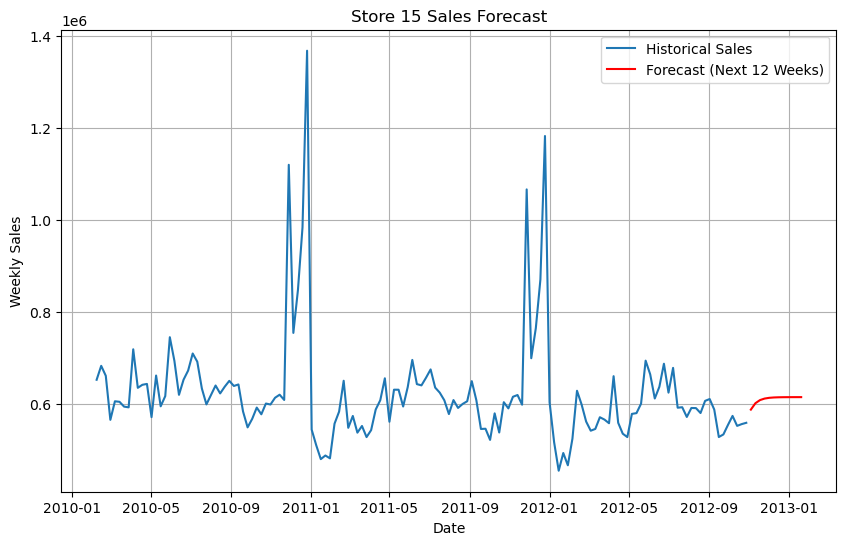

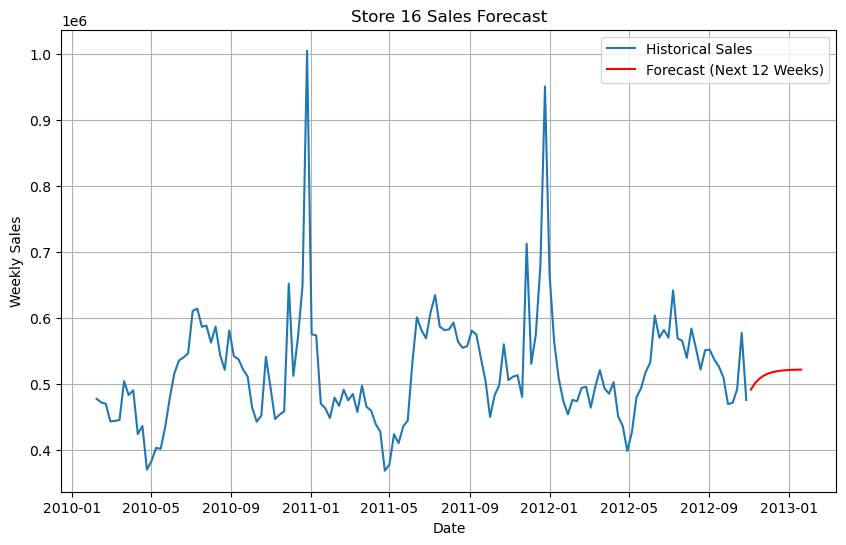

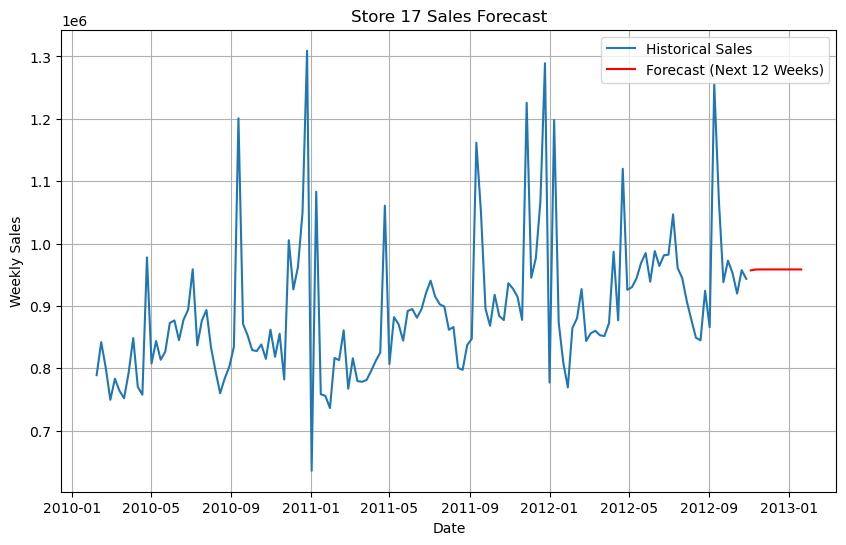

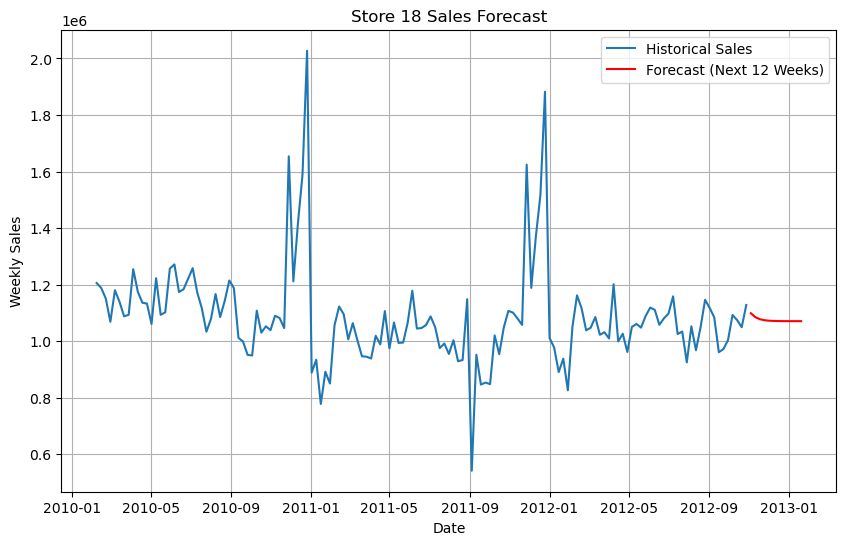

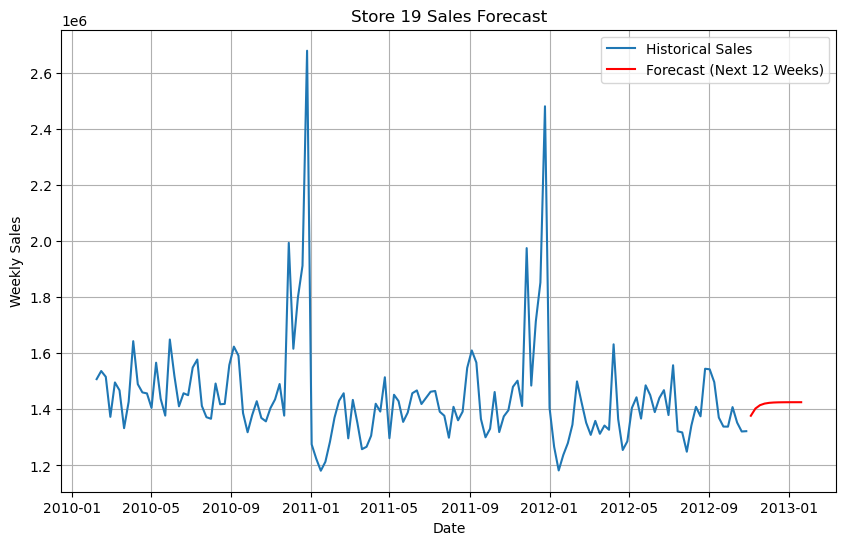

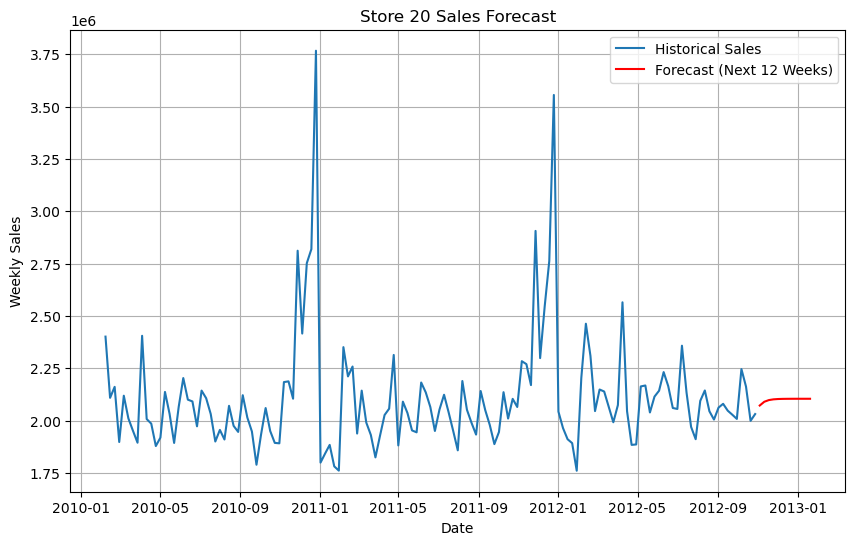

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


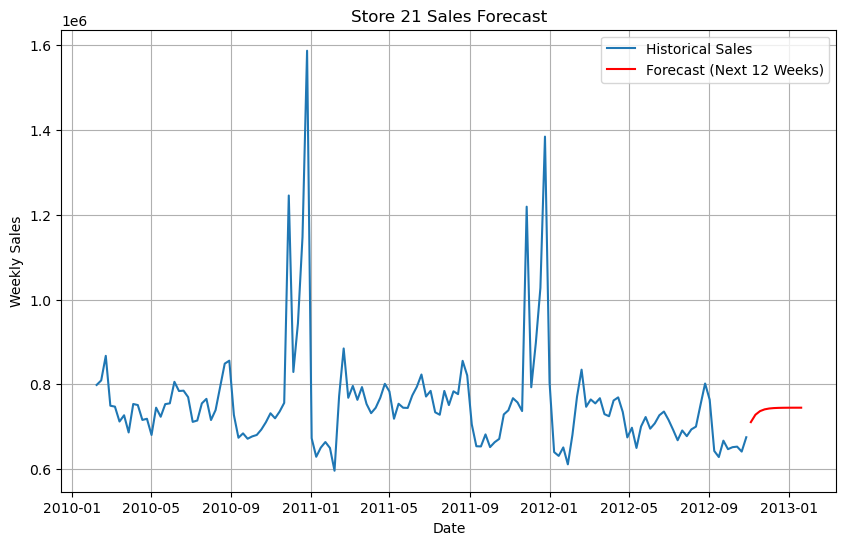

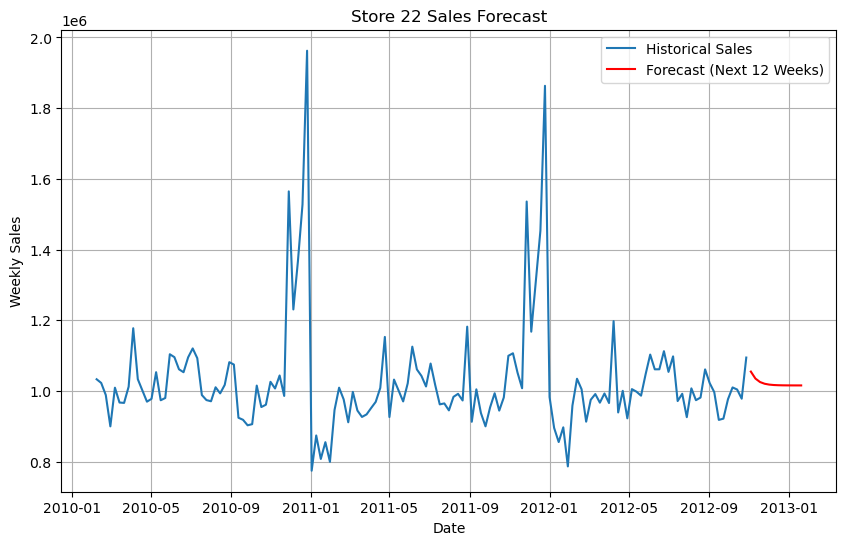

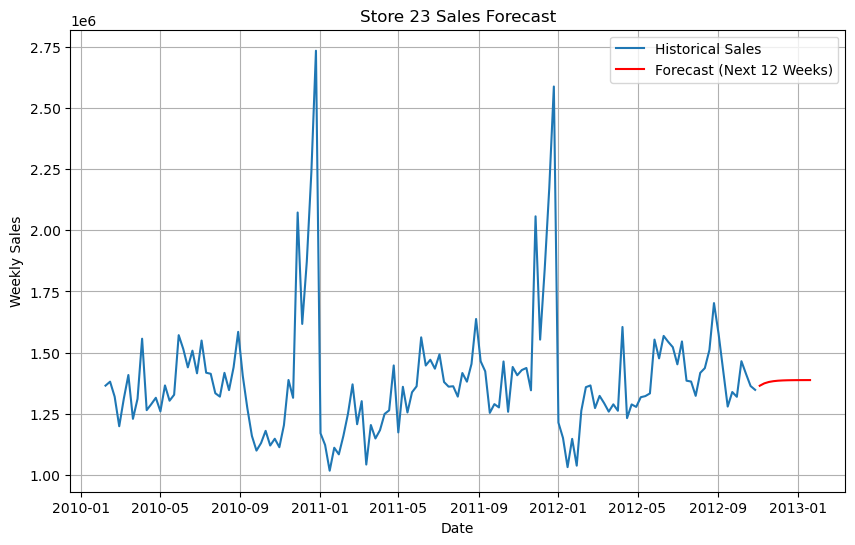

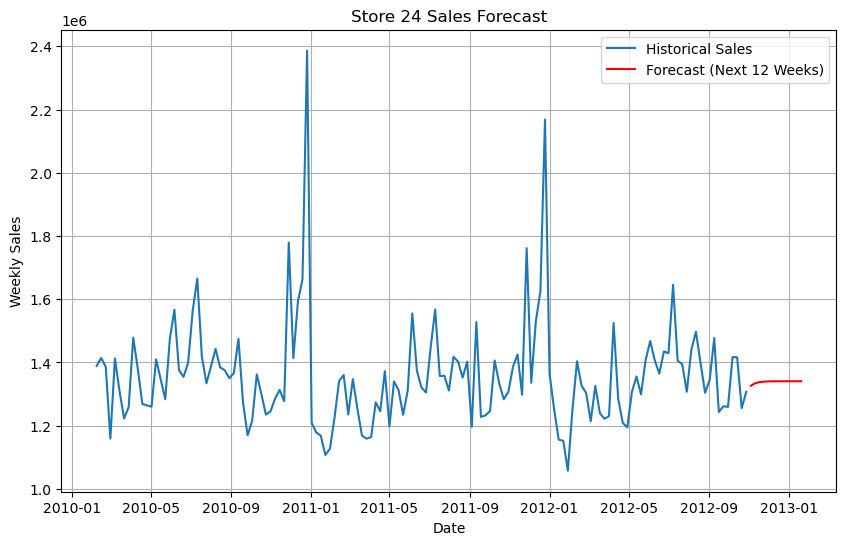

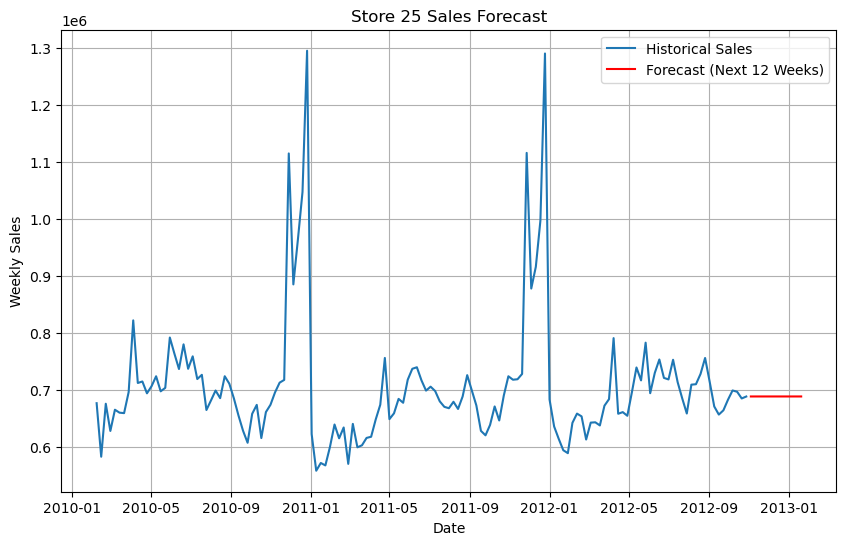

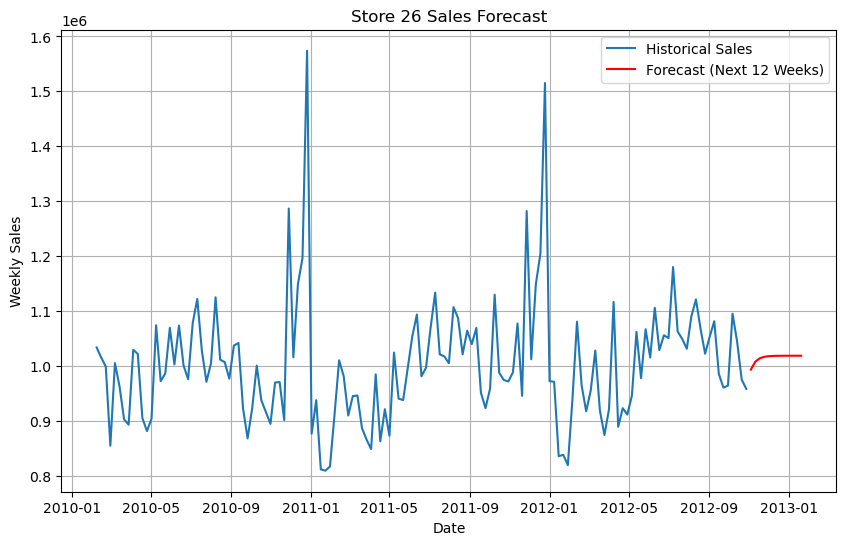

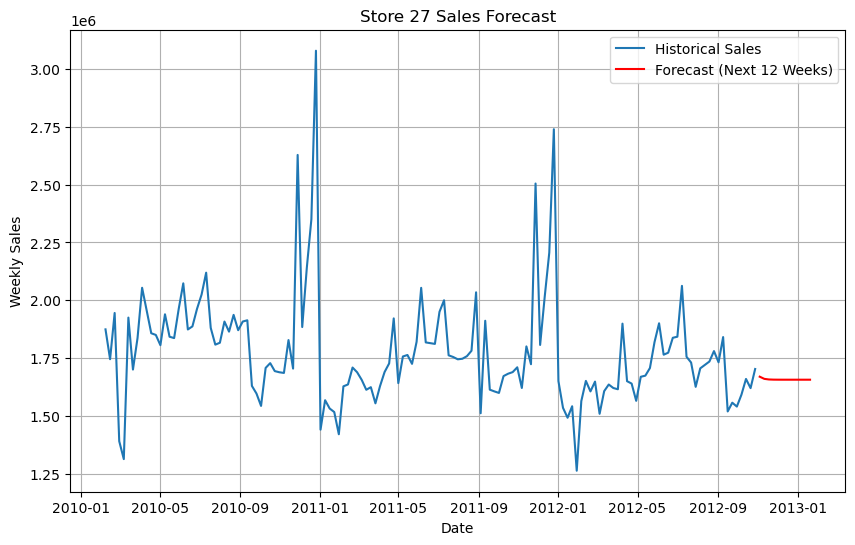

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


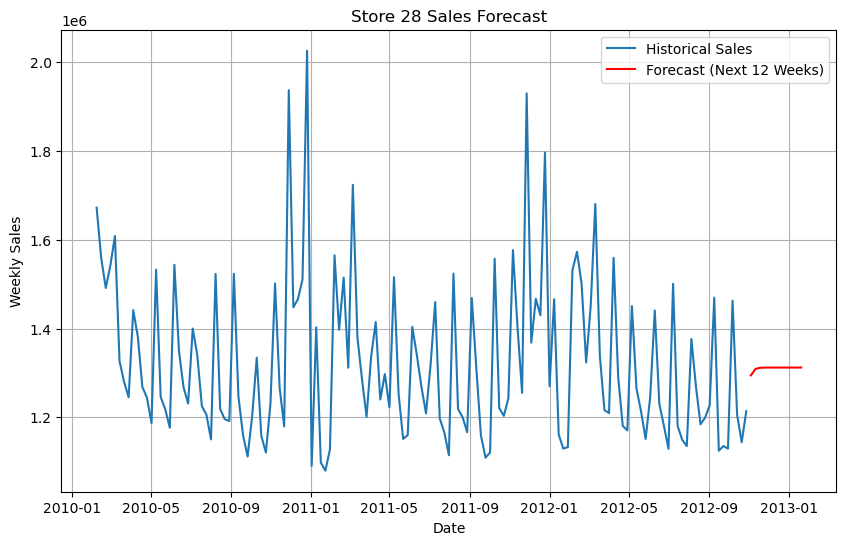

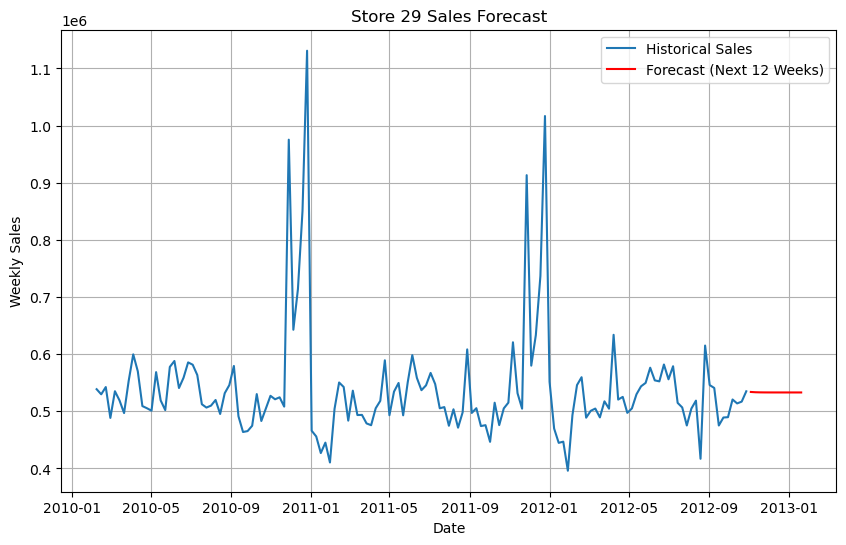

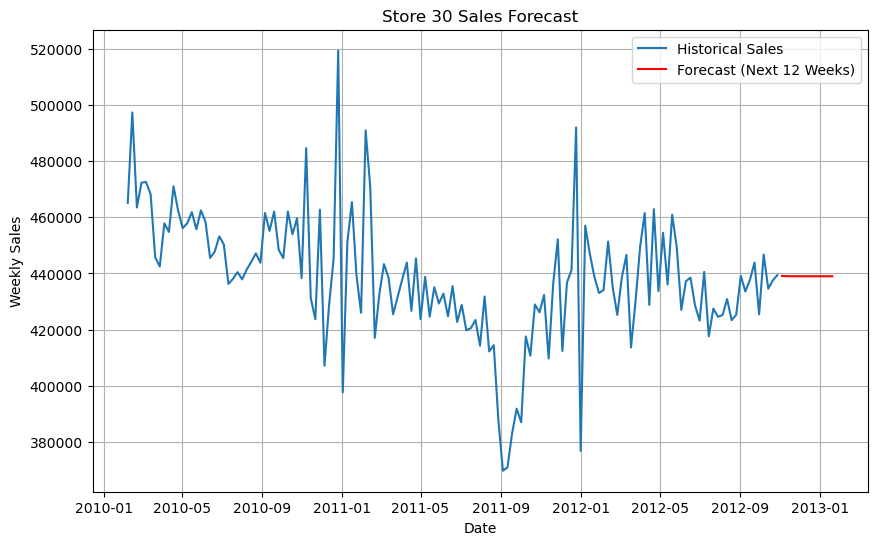

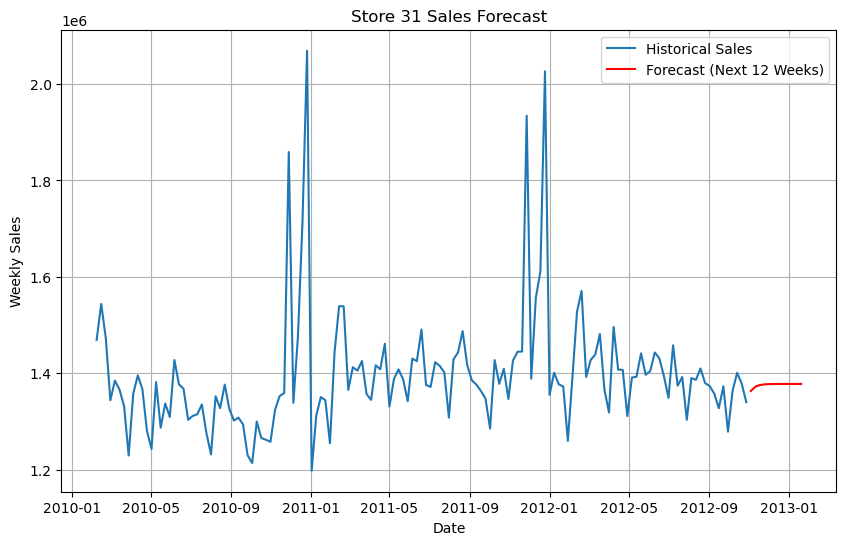

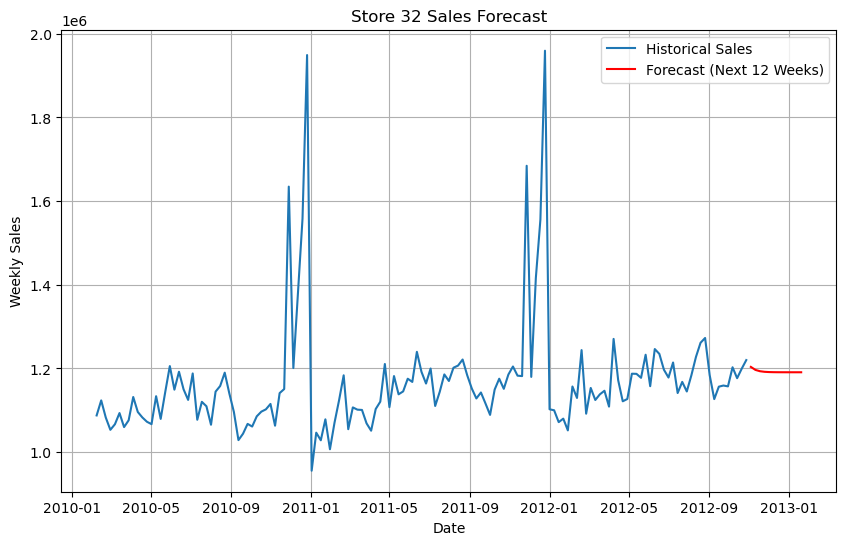

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


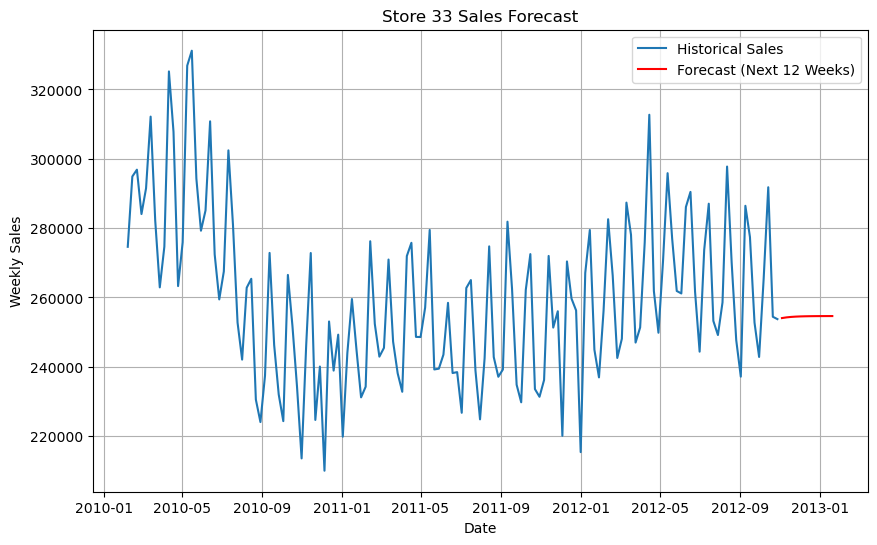

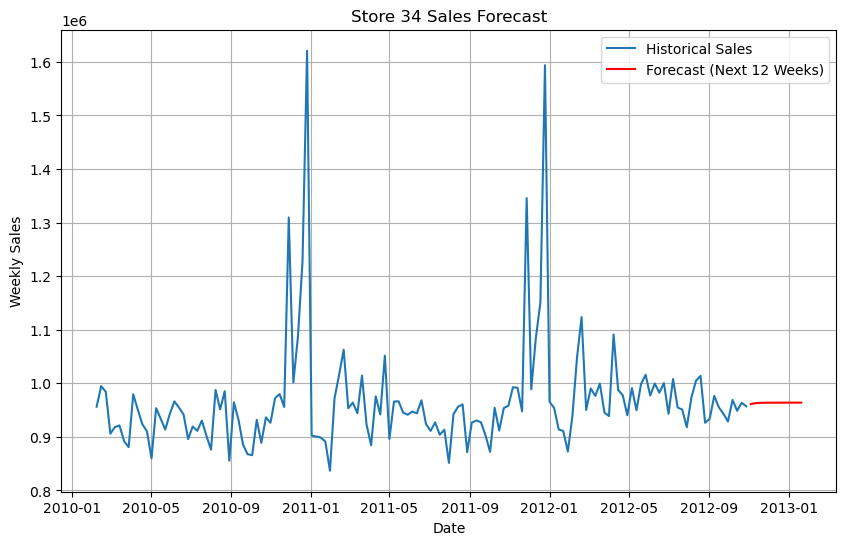

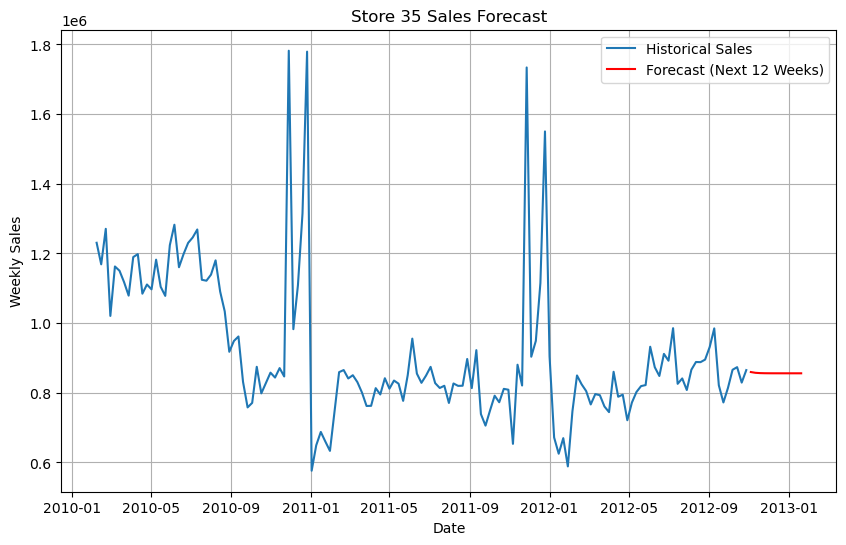

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


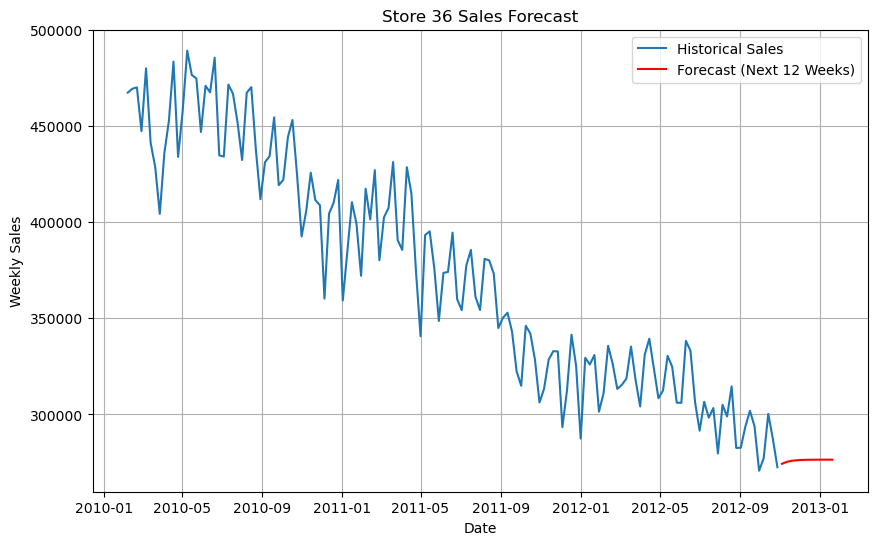

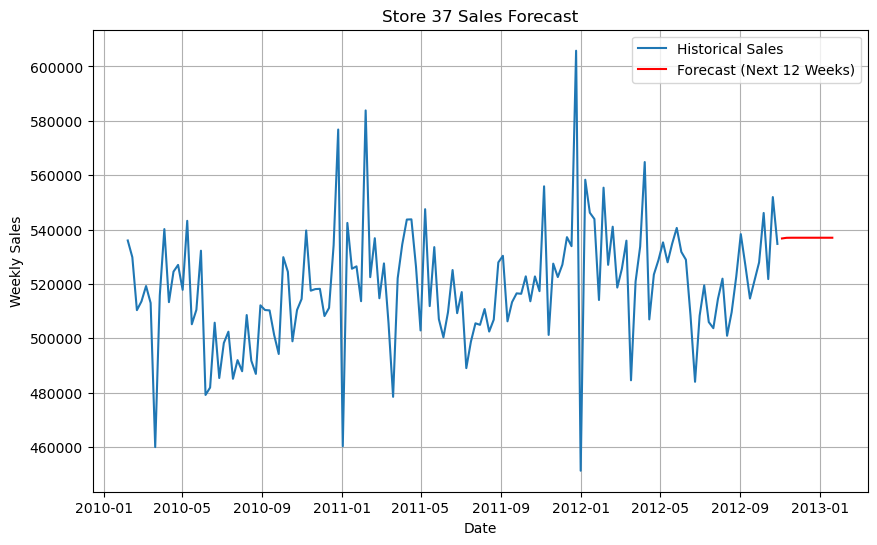

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


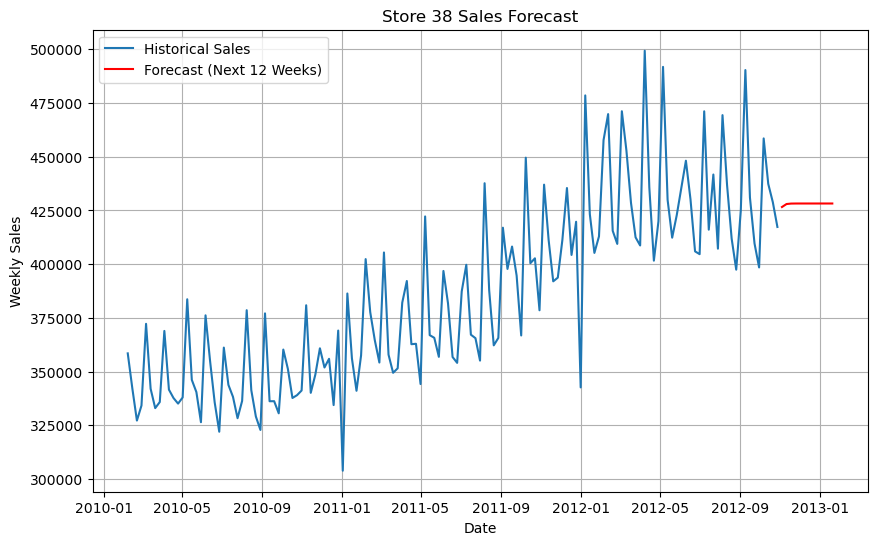

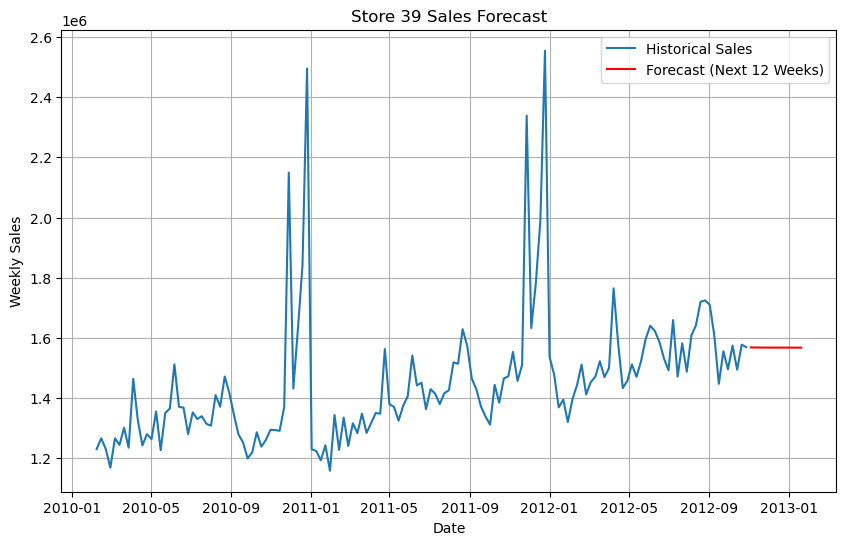

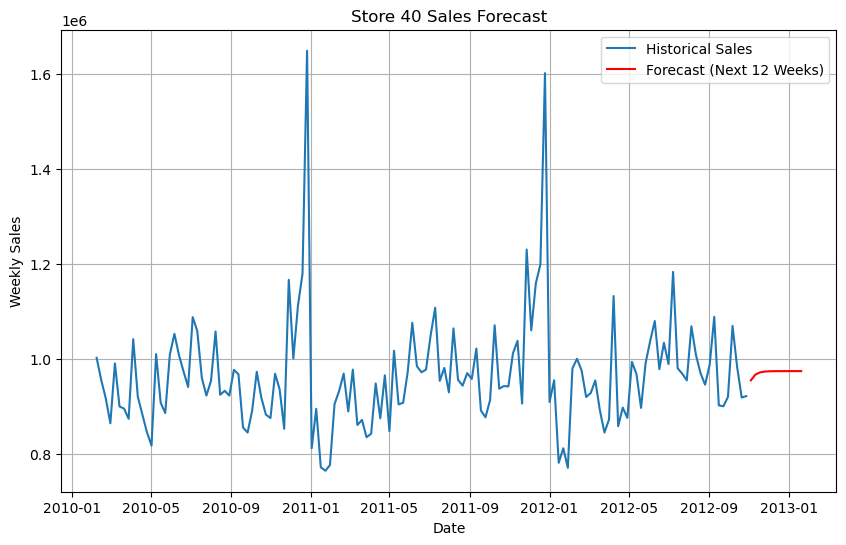

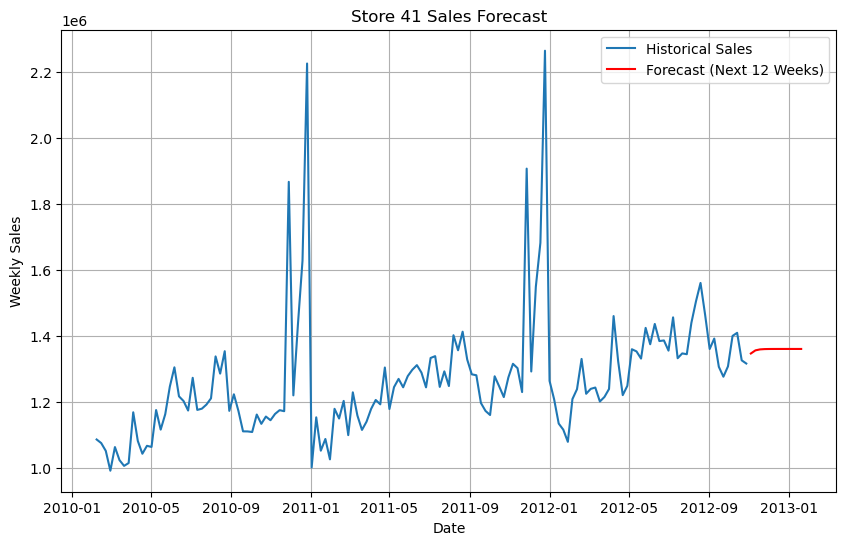

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


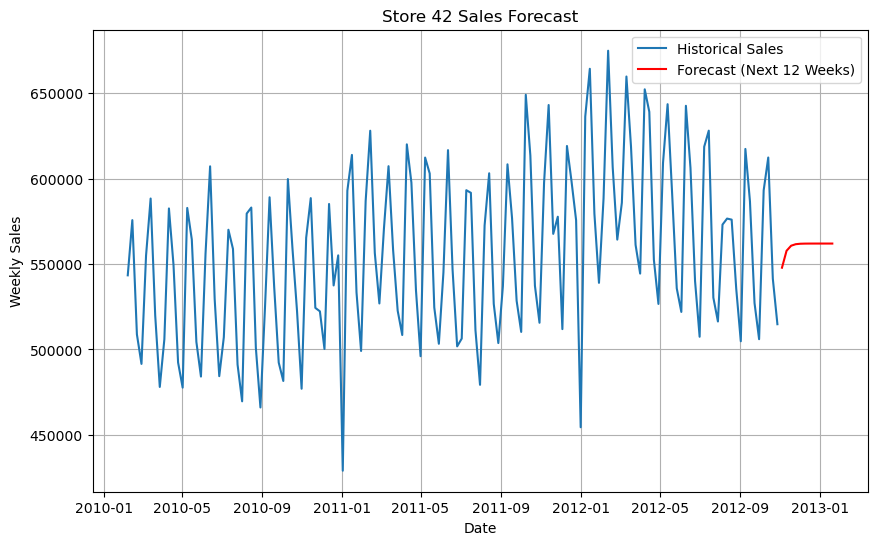

C:\Users\anjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


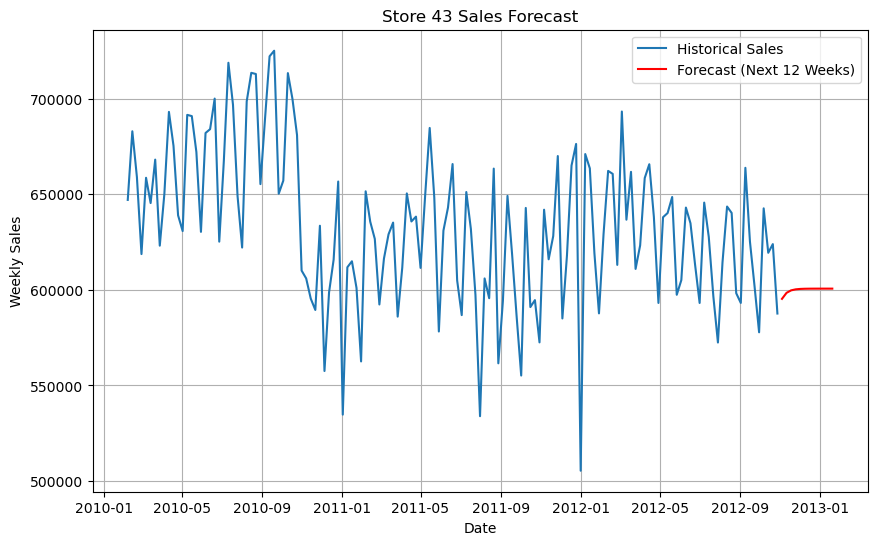

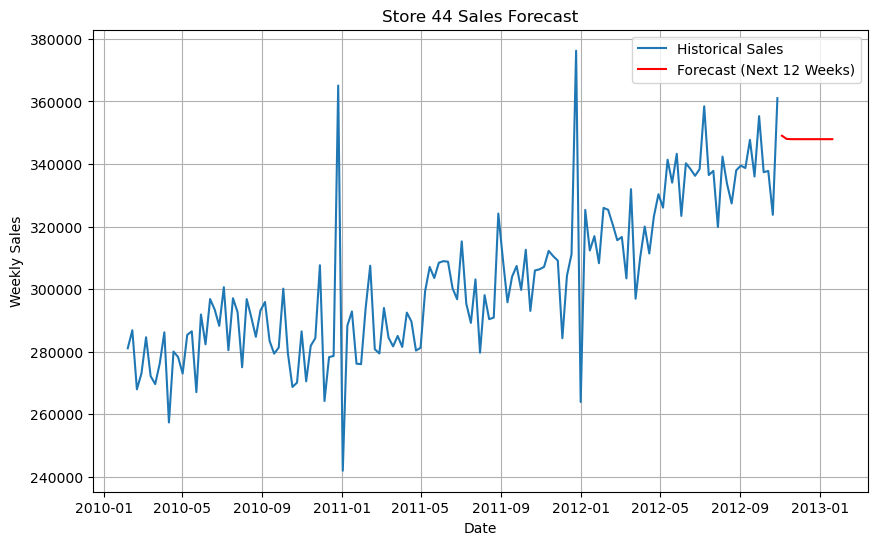

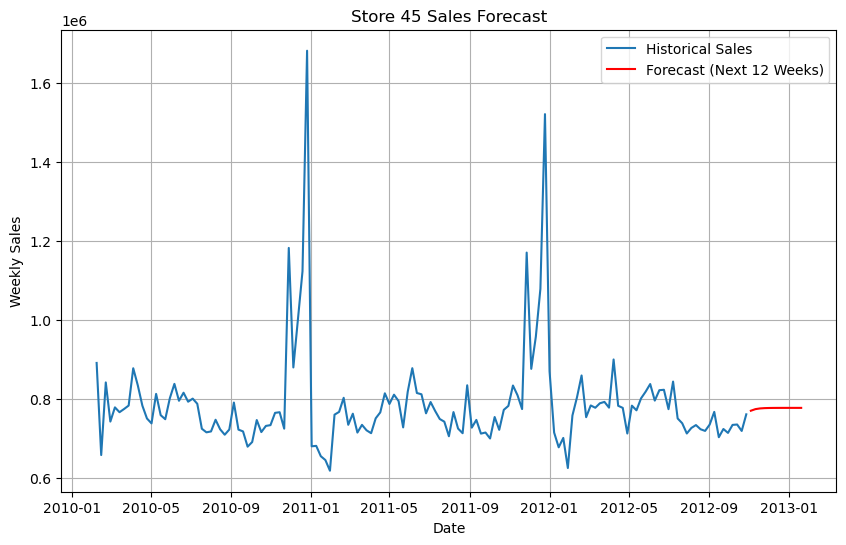

Sales forecast for Store 1 for the next 12 weeks:
2012-11-04    1.538713e+06
2012-11-11    1.556450e+06
2012-11-18    1.563433e+06
2012-11-25    1.566182e+06
2012-12-02    1.567265e+06
2012-12-09    1.567691e+06
2012-12-16    1.567859e+06
2012-12-23    1.567925e+06
2012-12-30    1.567951e+06
2013-01-06    1.567961e+06
2013-01-13    1.567965e+06
2013-01-20    1.567966e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

forecast_results = {}
for store_id in walmart['Store'].unique():
    store_data = walmart[walmart['Store'] == store_id]
    store_sales = store_data['Weekly_Sales'].resample('W').sum()
    model = ARIMA(store_sales, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
    forecast_results[store_id] = forecast

    plt.figure(figsize=(10,6))
    plt.plot(store_sales.index, store_sales, label='Historical Sales')
    plt.plot(forecast.index, forecast, label='Forecast (Next 12 Weeks)', color='red')
    plt.title(f'Store {store_id} Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"Sales forecast for Store 1 for the next 12 weeks:\n{forecast_results[1]}")
